In [38]:
import numpy as np
import matplotlib.pyplot as plt
from wordle.wordle import get_data, W_LEN

data = get_data()
len(data)

15918

In [52]:
alphabet = sorted(list(set("".join(data))))
vocab_size = len(alphabet)

stoi = {l: i for i, l in enumerate(alphabet)}
itos = {i: l for i, l in enumerate(alphabet)}

encode = lambda w: [stoi[l] for l in w]  # string -> list of ints
decode = lambda w: "".join([itos[i] for i in w])  # list of ints -> string

18
9
5


/tmp/ipykernel_1207/504823998.py:27: RuntimeWarning: invalid value encountered in divide
  probs = counter / np.sum(counter, axis=1, keepdims=True)


('r', 'i', 'e')

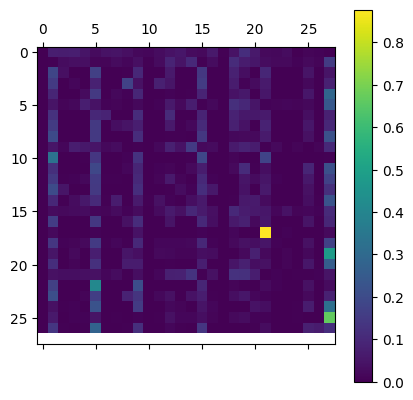

In [150]:
class DataStats:
    def __init__(self, dataset, max_wlen):
        self.dataset = dataset
        self.max_wlen = max_wlen

        self.alphabet = ["<start>", *sorted(list(set("".join(self.dataset)))), "<end>"]
        self.vocab_size = len(self.alphabet)

        stoi = {l: i for i, l in enumerate(self.alphabet)}
        itos = {i: l for i, l in enumerate(self.alphabet)}

        self.encode = lambda w: [stoi["<start>"], *[stoi[l] for l in w], stoi["<end>"]]  # string -> list of ints
        self.decode = lambda w: "".join([itos[i] for i in w])  # list of ints -> string

        self.prob_table = self.build_prob_table()

    def build_prob_table(self):
        # TODO: add start + end to counter
        counter = np.zeros([self.vocab_size, self.vocab_size], dtype=np.float32)

        # worked => counter[word[i][word[i+1]]++
        for w in self.dataset:
            _w = self.encode(w)
            for i, _ in enumerate(_w[:-1]):
                counter[_w[i], _w[i + 1]] += 1

        probs = counter / np.sum(counter, axis=1, keepdims=True)

        t = plt.matshow(probs)
        plt.colorbar(t)
        return probs

    def sample(self, w, top_k=4):
        # sample based on last letter
        l = self.encode(w)[-2]  # get the "last" char [real last char is <end>]
        _probs = self.prob_table[self.encode(w)[-2], :-1]  # get probs next letters (skip "<end>")
        idx = np.argpartition(-_probs, top_k)[:top_k]  # [top_k, 1] pick top_k idx
        probs = np.take(_probs, idx)  # [top_k, 1]

        s_idx = np.random.multinomial(1, probs)  # [top_k, 1]
        idx = idx * s_idx
        candidate = idx[idx != 0][0]
        print(candidate)

        return self.decode([candidate])


d = DataStats(data, W_LEN)
d.sample("a"), d.sample("b"), d.sample("adap")